# Family Violence Incidents in Victoria 2023

In [1]:
import pandas as pd
import numpy as np
import matplotlib as plt

In [6]:
df1 = pd.read_csv(r"C:\Users\user\Desktop\Crime_Data_Project\Crime_Stats_Table_3.csv")
df1

,Year,Year ending,Local Government Area,Postcode,Suburb/Town Name,Offence Division,Offence Subdivision,Offence Subgroup,Offence Count
0,2023,March,Alpine,3691,Dederang,A Crimes against the person,A20 Assault and related offences,A212 Non-FV Serious assault,1
1,2023,March,Alpine,3691,Dederang,A Crimes against the person,Other crimes against the person,Other crimes against the person,1
2,2023,March,Alpine,3691,Dederang,B Property and deception offences,B40 Theft,B42 Steal from a motor vehicle,2
3,2023,March,Alpine,3691,Dederang,B Property and deception offences,B40 Theft,B49 Other theft,1
4,2023,March,Alpine,3691,Dederang,D Public order and security offences,D10 Weapons and explosives offences,D11 Firearms offences,1
...,...,...,...,...,...,...,...,...,...
359127,2014,March,Yarriambiack,3489,Tempy,B Property and deception offences,B20 Property damage,B21 Criminal damage,1
359128,2014,March,Yarriambiack,3489,Tempy,B Property and deception offences,B30 Burglary/Break and enter,B322 Non-residential non-aggravated burglary,1
359129,2014,March,Yarriambiack,3489,Tempy,E Justice procedures offences,E20 Breaches of orders,E22 Breach intervention order,1
359130,2014,March,Yarriambiack,3491,Patchewollock,A Crimes against the person,A20 Assault and related offences,A212 Non-FV Serious assault,1


In [7]:
df2 = pd.read_csv(r"C:\Users\user\Desktop\Crime_Data_Project\Crime_Stats_Table_1.csv")

# filter for FV "Offence Subgroup", w/o non-FV

In [13]:
FV_Table_w_non = df1[df1['Offence Subgroup'].str.contains('FV')]

In [22]:
df1FV = FV_Table_w_non[FV_Table_w_non['Offence Subgroup'].str.contains('Non-FV') ==False]

In [23]:
df1FV

,Year,Year ending,Local Government Area,Postcode,Suburb/Town Name,Offence Division,Offence Subdivision,Offence Subgroup,Offence Count
8,2023,March,Alpine,3691,Running Creek,A Crimes against the person,"A70 Stalking, harassment and threatening behav...",A731 FV Threatening behaviour,1
10,2023,March,Alpine,3697,Tawonga,A Crimes against the person,A20 Assault and related offences,A211 FV Serious assault,1
11,2023,March,Alpine,3697,Tawonga,A Crimes against the person,A20 Assault and related offences,A231 FV Common assault,1
28,2023,March,Alpine,3699,Mount Beauty,A Crimes against the person,A20 Assault and related offences,A211 FV Serious assault,1
29,2023,March,Alpine,3699,Mount Beauty,A Crimes against the person,A20 Assault and related offences,A231 FV Common assault,1
...,...,...,...,...,...,...,...,...,...
359073,2014,March,Yarriambiack,3393,Warracknabeal,A Crimes against the person,"A70 Stalking, harassment and threatening behav...",A711 FV Stalking,2
359075,2014,March,Yarriambiack,3393,Warracknabeal,A Crimes against the person,"A70 Stalking, harassment and threatening behav...",A731 FV Threatening behaviour,1
359110,2014,March,Yarriambiack,3396,Hopetoun,A Crimes against the person,A20 Assault and related offences,A211 FV Serious assault,3
359111,2014,March,Yarriambiack,3396,Hopetoun,A Crimes against the person,A20 Assault and related offences,A231 FV Common assault,1


In [36]:
count = df1FV.groupby('Local Government Area')['Offence Count'].sum()
print(count)

KeyError: 'Column not found: Offence Count'

# found white space in column name "Offence Count"

In [39]:
df1FV.columns = df1FV.columns.str.strip()

In [40]:
df1FV.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 34667 entries, 8 to 359122
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Year                   34667 non-null  int64 
 1   Year ending            34667 non-null  object
 2   Local Government Area  34667 non-null  object
 3   Postcode               34667 non-null  int64 
 4   Suburb/Town Name       34667 non-null  object
 5   Offence Division       34667 non-null  object
 6   Offence Subdivision    34667 non-null  object
 7   Offence Subgroup       34667 non-null  object
 8   Offence Count          34667 non-null  object
dtypes: int64(2), object(7)
memory usage: 2.6+ MB


# found that "Offence Count" was dtype object, change to into64

In [50]:
df1FV["Offence Count"] = pd.to_numeric(df1FV["Offence Count"])

C:\Users\user\AppData\Local\Temp\ipykernel_18512\1777397062.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1FV["Offence Count"] = pd.to_numeric(df1FV["Offence Count"])


In [51]:
df1FV.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 34667 entries, 8 to 359122
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Year                   34667 non-null  int64 
 1   Year ending            34667 non-null  object
 2   Local Government Area  34667 non-null  object
 3   Postcode               34667 non-null  int64 
 4   Suburb/Town Name       34667 non-null  object
 5   Offence Division       34667 non-null  object
 6   Offence Subdivision    34667 non-null  object
 7   Offence Subgroup       34667 non-null  object
 8   Offence Count          34667 non-null  int64 
dtypes: int64(3), object(6)
memory usage: 2.6+ MB


In [52]:
count = df1FV.groupby('Local Government Area').sum()
print(count)

                          Year  Postcode  Offence Count
Local Government Area                                  
Alpine                  284693    526070            318
Ararat                  280564    469401           1011
Ballarat               1883531   3127194           5337
Banyule                1534078   2344788           4233
Bass Coast             1447530   2843404           2742
...                        ...       ...            ...
Wodonga                 351264    642137           2430
Wyndham                 950787   1429196          10760
Yarra                   761076   1160353           3420
Yarra Ranges           2426473   4179649           5575
Yarriambiack            367434    619937            463

[79 rows x 3 columns]


C:\Users\user\AppData\Local\Temp\ipykernel_18512\4194854307.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  count = df1FV.groupby('Local Government Area').sum()


In [70]:
count.info()

<class 'pandas.core.frame.DataFrame'>
Index: 79 entries, Alpine to Yarriambiack
Data columns (total 1 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   Offence Count  79 non-null     int64
dtypes: int64(1)
memory usage: 3.3+ KB


In [71]:
print(count)

                       Offence Count
Local Government Area               
Alpine                           318
Ararat                          1011
Ballarat                        5337
Banyule                         4233
Bass Coast                      2742
...                              ...
Wodonga                         2430
Wyndham                        10760
Yarra                           3420
Yarra Ranges                    5575
Yarriambiack                     463

[79 rows x 1 columns]


<Axes: xlabel='Local Government Area'>

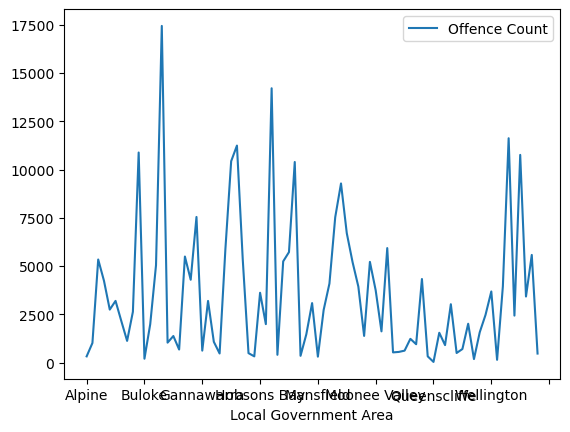

In [72]:
count.plot()